In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from collections.abc import Callable
import numpy as np 

In [2]:
"""
references:
    1. https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html
    2. https://fullstackquantumcomputation.tech/blog/deutsch-algorithm/
    3. https://www.youtube.com/watch?v=_BHvE_pwF6E&ab_channel=sentdex
    4. https://www.youtube.com/channel/UCxviAzujSpcNtJRiaXI_cFg/about
"""
def deutsch_jozsa(oracle : Callable[[QuantumCircuit], QuantumCircuit], n : int) -> QuantumCircuit:
    """
    oracle : the oracle to be tested by the algorithm
    n : input size of the oracle
    """
    # create n + 1 qubits and n classical bits circuit
    qc = QuantumCircuit(n + 1, n)

    # set the last qubit to ket{1}
    qc.x(n)

    # apply hadamard gate to all qubits
    for i in range(n+1):
        qc.h(i)

    # separate the circuit
    qc.barrier()
    
    # apply the oracle
    qc = oracle(qc)

    # apply hadamard gate to first n qubits
    for i in range(n):
        qc.h(i)

    # separate the circuit
    qc.barrier()

    # measure first n qubits to classical bits
    for i in range(n):
        qc.measure(i, i)
    
    # run simulation on circuit
    sim = Aer.get_backend('qasm_simulator')
    counts = execute(qc, backend=sim, shots=1024).result().get_counts()
    keys = counts.keys()
    
    # if the algorthm ran successfully, result should only has 1 entry {0 or 1}
    if len(keys) == 1:
        # parse result and output accordingly.
        res = int(list(keys)[0])
        if res == 0:
            print("The given Oracle is constant.")
        else:
            print("The given Oracle is balanced.")
    else:
        print("Failed to analyze the given oracle.")
    
    return qc
    

In [3]:
def balanced_oracle_ex1(qc : QuantumCircuit) -> QuantumCircuit:
    n = 5
    for i in range(n):
        if i % 2 == 0:
            qc.x(i)
        qc.cx(i, n)
    return qc

In [4]:
def constant_oracle_ex1(qc : QuantumCircuit) -> QuantumCircuit:
    n = 5
    flip = np.random.randint(2)
    if flip == 1:
        for i in range(n + 1):
            qc.x(i)
    return qc

In [12]:
qc = deutsch_jozsa(constant_oracle_ex1, 5)

The given Oracle is constant.


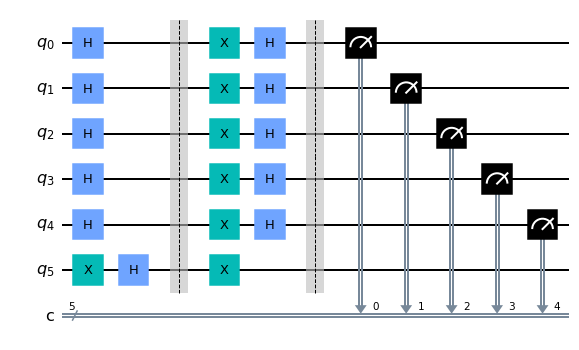

In [13]:
qc.draw(output='mpl')

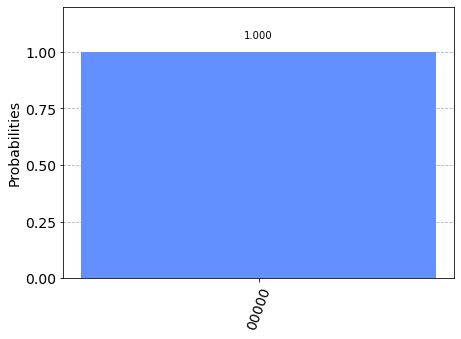

In [7]:
sim = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=sim, shots=1024).result().get_counts()
plot_histogram(counts)